In [110]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy.linalg import inv,det

In [188]:
with open('input.data','r') as f:
    X = []
    Y = []
    for line in f.readlines():
        X = np.append(X,line.rstrip().split(' ')[0])
        Y = np.append(Y,line.rstrip().split(' ')[1])

In [189]:
X = X.astype(np.float32).reshape(-1,1)
Y = Y.astype(np.float32).reshape(-1,1)

In [190]:
#part1

def kernel(X1, X2, alpha=1,ㄒ, var=5):
    """
    Rational quadratic kernel.
    
    Args:
        X1: Array of n points (n x 1).
        X2: Array of m points (m x 1).
        alpha: the scale of mixture
        
    Returns:
        (n x m) matrix.
    """
    square_error=np.power(X1.reshape(-1,1)-X2.reshape(1,-1),2.0)
    kernel= var*np.power(1+square_error/(2*alpha*length_scale**2),-alpha)
    return kernel

X_test = np.linspace(-60, 60, 10000).reshape(-1, 1)
beta = 5

In [191]:
print(cov)

[[5.0000000e+00 1.8535782e+00 1.8773344e-01 ... 1.1566938e-03
  1.0776867e-03 1.0142599e-03]
 [1.8535782e+00 5.0000000e+00 3.3029044e-01 ... 1.2039309e-03
  1.1201231e-03 1.0529720e-03]
 [1.8773344e-01 3.3029044e-01 5.0000000e+00 ... 1.3577263e-03
  1.2576859e-03 1.1780089e-03]
 ...
 [1.1566938e-03 1.2039309e-03 1.3577263e-03 ... 5.0000000e+00
  7.5691038e-01 2.3878472e-01]
 [1.0776867e-03 1.1201231e-03 1.2576859e-03 ... 7.5691038e-01
  5.0000000e+00 9.2587113e-01]
 [1.0142599e-03 1.0529720e-03 1.1780089e-03 ... 2.3878472e-01
  9.2587113e-01 5.0000000e+00]]


In [192]:
def posterior(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    """
    Computes the suffifient statistics of the posterior distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    """
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (7)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (8)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

In [193]:
mu_s, cov_s = posterior(X_test, X, Y)


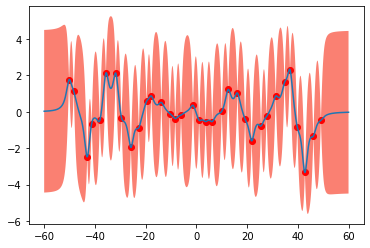

In [194]:
plt.plot(X,Y,'ro')
plt.plot(X_test,mu_s)
plt.fill_between(X_test.reshape(-1),mu_s.reshape(-1)+2*np.sqrt(cov_s.diagonal()),mu_s.reshape(-1)-2*np.sqrt(cov_s.diagonal()),facecolor='salmon')

In [202]:
#part2
from scipy.optimize import minimize
def objective_function(X,y,beta):
    '''
    :param X:  (n) ndarray
    :param y:  (n) ndarray
    :param beta:
    :return:
    '''
    def objective(theta):
        K=kernel(X,X,alpha=theta[0],length_scale=theta[1])+(1/beta)*np.identity(len(X))
        L=np.linalg.cholesky(K)
        return (0.5*y.reshape(1,-1) @ np.linalg.inv(K) @ y.reshape(-1,1) + np.sum(np.log(np.diag(L))) + 0.5*len(X)*np.log(2*np.pi)
)[0]
    return objective

objective_value=1e9
inits=[1e-2,1e-1,0,1e1,1e2]
for init_alpha in inits:
    for init_length_scale in inits:
        res=minimize(objective_function(X,Y,beta),x0=[init_alpha,init_length_scale],bounds=((1e-5,1e5),(1e-5,1e5)))
        if res.fun<objective_value:
            objective_value = res.fun
            alpha_optimize,length_scale_optimize=res.x
print('alpha: ',alpha_optimize)
print('length_scale: ',length_scale_optimize)


alpha:  0.8571264563101137
length_scale:  3.7026333578671773


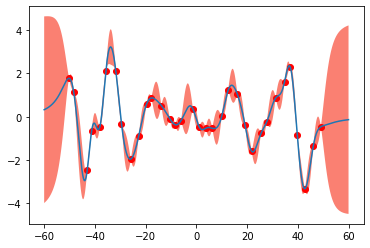

In [203]:
mu_s, cov_s = posterior(X_test, X, Y,alpha_optimize,length_scale_optimize)
plt.plot(X,Y,'ro')
plt.plot(X_test,mu_s)
plt.fill_between(X_test.reshape(-1),mu_s.reshape(-1)+2*np.sqrt(cov_s.diagonal()),mu_s.reshape(-1)-2*np.sqrt(cov_s.diagonal()),facecolor='salmon')